In [3]:
#import csv, split dependent and independent vars
import pandas as pd

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#visualize
import matplotlib.pyplot as plt



In [4]:
df = pd.read_csv('class_lm.csv')

In [5]:
df.head()

,y,x1,x2,x3,x4,x5,x6
0,0,125,13462,1457,23499,1330,144
1,4,1156,14676,2377,30723,858,153
2,7,702,14473,3104,1814,9128,171
3,10,1648,5130,751,69288,1456,104
4,12,1799,3720,1634,35921,17209,102


In [6]:
features = pd.DataFrame(df, columns = ["x1","x2","x3","x4","x5","x6"])
target = pd.DataFrame(df, columns = ["y"])

In [7]:
target.head()

,y
0,0
1,4
2,7
3,10
4,12


In [8]:
lm = linear_model.LinearRegression()
model = lm.fit(features, target)

In [9]:
#R square
lm.score(features, target)

0.9209227520681926

In [10]:
#if increase the x1 by 1, y will increse 0.737 
#need to scale them
lm.coef_

array([[ 0.73724129, -0.00090439,  0.17532095,  0.00098104, -0.0019734 ,
         0.4007403 ]])

In [11]:
predictions = lm.predict(features)

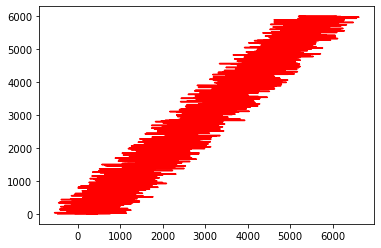

In [12]:
#compare the real one and the predict one
plt.plot(predictions, target, color='r')
plt.show()

## scale standarlization normalization

In [26]:
#if do not write: 'with_mean=False', then substract from mean
df2 = pd.DataFrame(preprocessing.scale(df,with_mean=False))
df2.columns=df.columns
df2

,y,x1,x2,x3,x4,x5,x6
0,0.000000,0.067999,1.570662,0.690547,1.007804,0.219212,5.074532
1,0.002309,0.628855,1.712304,1.126582,1.317620,0.141417,5.391690
2,0.004041,0.381883,1.688619,1.471145,0.077797,1.504487,6.026007
3,0.005773,0.896499,0.598536,0.355937,2.971560,0.239980,3.664940
4,0.006928,0.978642,0.434026,0.774436,1.540547,2.836407,3.594460
...,...,...,...,...,...,...,...
1995,3.455987,4.104967,0.431226,3.886875,1.725991,2.165090,5.638369
1996,3.457719,3.384177,2.433115,3.842797,3.168026,3.180883,6.166966
1997,3.459451,4.192549,3.412591,3.316237,2.113861,0.613464,4.933573
1998,3.460606,3.649645,3.544899,2.942764,2.658055,3.214507,4.651654


In [18]:
features = pd.DataFrame(df2, columns = ["x1","x2","x3","x4","x5","x6"])
target = pd.DataFrame(df2, columns = ["y"])

In [27]:
target.head()

,y
0,0.000000
1,0.002309
2,0.004041
3,0.005773
4,0.006928


In [28]:
lm = linear_model.LinearRegression()
model = lm.fit(features, target)

In [29]:
#R square
lm.score(features, target)

0.9209227520681925

In [31]:
#coefficient after scale
lm.coef_

array([[ 0.78244219, -0.00447528,  0.21356768,  0.01320676, -0.00691253,
         0.00656546]])

In [32]:
predictions = lm.predict(features)

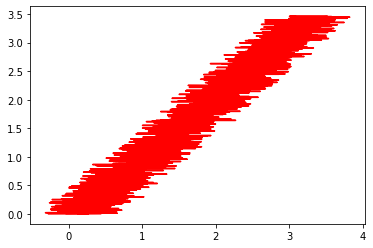

In [33]:
#compare the real one and the predict one
plt.plot(predictions, target, color='r')
plt.show()

## split data into training and testing data

In [35]:
df_train, df_test = train_test_split(df2, test_size=0.25)

In [36]:
df_test.head()

,y,x1,x2,x3,x4,x5,x6
456,0.789808,0.755605,3.531715,0.931788,0.727150,1.840228,5.356450
603,1.044994,1.133680,1.590730,1.620440,0.593171,1.484050,5.321211
849,1.471075,1.535691,2.829339,2.306721,0.398464,0.706094,4.686894
1097,1.900620,2.596476,3.486212,3.399653,2.806016,0.154767,5.074532
635,1.100420,1.558538,3.130707,2.531374,3.090100,1.983458,3.559220


In [37]:
features_train = pd.DataFrame(df_train, columns = ["x1","x2","x3","x4","x5","x6"])
features_test = pd.DataFrame(df_test, columns = ["x1","x2","x3","x4","x5","x6"])

target_train = pd.DataFrame(df_train, columns = ["y"])
target_test = pd.DataFrame(df_test, columns = ["y"])

In [38]:
lm = linear_model.LinearRegression()
model = lm.fit(features_train, target_train)

In [39]:
#R square
lm.score(features_test, target_test)

0.9144138544006682

In [41]:
lm.coef_

array([[ 0.78487686, -0.00677946,  0.2067846 ,  0.01349125, -0.01114793,
         0.00862653]])

In [42]:
predictions = lm.predict(features_test)

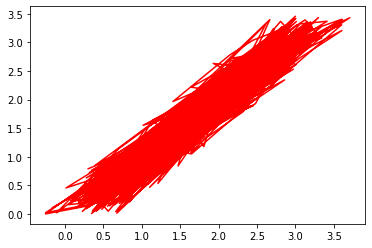

In [43]:
plt.plot(predictions, target_test, color='r')
plt.show()